<center>
<img src="https://raw.githubusercontent.com/COGS108/Lectures-Wi22/main/02_python/img/pandas.png" alt="pandas" width="600px">
</center>



# cogs 108: data wrangling
- `pandas`
- where to find data?
    - web scraping and apis

# pandas
pandas is a python library for managing heterogenous data

at its core, pandas is used for the **dataframe** object, which is:
- a data strucutre for labeled rows and columns of data.
- associated methods and ultilies for working with data.
- each column contains a `pandas` serries


pandas dataframe object has-
- index for each row
- column name for each colum (series)
- stores heterogenous types

### setup

In [39]:
# import standard libraries
import pandas as pd
import numpy as np

### loading data

In [40]:
# load a csv file of data
df = pd.read_csv('https://raw.githubusercontent.com/COGS108/Lectures-Wi22/main/02_python/data/my_data.csv')
type(df)

pandas.core.frame.DataFrame

In [41]:
# check out a few of the first rows of the dataframe
df.head()

,id,first_name,last_name,age,score,value
0,295,Andrea,Clark,46,-1,24547.87
1,620,Bill,Woods,46,492,46713.90
2,891,Alexander,Jacobson,48,489,32071.74
3,914,Derrick,Bradley,52,-1,30650.48
4,1736,Allison,Thomas,44,-1,9553.12


In [42]:
# check out a few of the last rows of the dataframe
df.tail()

,id,first_name,last_name,age,score,value
195,97441,Krista,Ortiz,34,-1,24074.79
196,97728,Anna,Chambers,37,598,0.00
197,98115,Jennifer,Pitts,29,606,6876.75
198,98284,Brittany,Jenkins,34,665,43525.88
199,98366,Katelyn,Brown,45,501,29668.38


### slicing

In [43]:
# slicing (indexing): select a series (column) using its name
df['first_name']

0         Andrea
1           Bill
2      Alexander
3        Derrick
4        Allison
         ...    
195       Krista
196         Anna
197     Jennifer
198     Brittany
199      Katelyn
Name: first_name, Length: 200, dtype: object

In [44]:
# slicing (indexing): select a sereis (column) using a row index
df.loc[0]

id                 295
first_name      Andrea
last_name        Clark
age                 46
score               -1
value         24547.87
Name: 0, dtype: object

In [45]:
# changing the row indexes into the passed in argument
# df.set_index('first_name')

In [46]:
# slicing (indexing): select a series (column) using a changed row index
df.set_index('first_name').loc['Andrea']

,id,last_name,age,score,value
first_name,,,,,
Andrea,295,Clark,46,-1,24547.87
Andrea,15137,Simpson,55,-1,12155.47


In [47]:
# slicing: select  a row and column with 'loc'
df.loc[1, 'score']

492

In [48]:
# to get a subset of all of those who are older then 60
df[df['age'] > 60]

,id,first_name,last_name,age,score,value
8,2635,David,Coleman,68,351,66035.28
22,13120,Daniel,Key,64,165,17444.32
39,22584,Kenneth,Johnson,65,-1,50174.14
51,27225,Dennis,Mason,62,622,105449.11
53,29566,James,Kennedy,69,224,NaN
54,29868,Jason,Bentley,69,343,60605.08
85,47669,Michael,Cowan,61,263,16167.90
89,50960,Maxwell,Mcbride,63,347,105598.79
94,52428,Bryan,Barnett,64,445,59795.50
109,58794,Jared,Brown,61,731,51968.96


### checking out the dataframe

In [49]:
# check how large our dataframe is
df.shape # print out (rows, columns[series])

(200, 6)

In [50]:
# check what columns we have in our dataframe
df.columns

Index(['id', 'first_name', 'last_name', 'age', 'score', 'value'], dtype='object')

In [51]:
# check the datatypes of our variables
df.dtypes

id              int64
first_name     object
last_name      object
age             int64
score           int64
value         float64
dtype: object

### exploring the data
- quantitative (numbers)
- qualitative (categorical)
- basic descriptive statistics

In [52]:
# checking categorical data
df['first_name'].value_counts()

David       6
Michael     5
Eric        4
Charles     4
James       4
           ..
Alison      1
Andrew      1
Vanessa     1
Samantha    1
Katelyn     1
Name: first_name, Length: 134, dtype: int64

In [53]:
# checking categorical data from the 4th index to second to last
df['first_name'].value_counts()[4:-2]

James        4
Elizabeth    3
Ashley       3
Jonathan     3
Sarah        3
            ..
Candace      1
Kristin      1
Alison       1
Andrew       1
Vanessa      1
Name: first_name, Length: 128, dtype: int64

In [54]:
# check a particular descriptive statistic
df['value'].std()

32493.94574115322

In [55]:
# describe a particular column
df['value'].describe() # runs different math methods

count       189.000000
mean      28730.336296
std       32493.945741
min           0.000000
25%        9593.030000
50%       17976.510000
75%       33163.310000
max      204999.960000
Name: value, dtype: float64

In [56]:
# get descriptive statistics of all numerical columns
df.describe()

,id,age,score,value
count,200.000000,200.000000,200.000000,189.000000
mean,52929.150000,46.020000,416.595000,28730.336296
std,29414.298899,10.028582,237.176674,32493.945741
min,295.000000,14.000000,-1.000000,0.000000
25%,26709.500000,39.000000,288.750000,9593.030000
50%,54643.500000,46.000000,463.500000,17976.510000
75%,80840.750000,53.000000,596.500000,33163.310000
max,98366.000000,69.000000,942.000000,204999.960000


In [57]:
# get desciptive statistics of the 'age' column
df['age'].describe()

count    200.000000
mean      46.020000
std       10.028582
min       14.000000
25%       39.000000
50%       46.000000
75%       53.000000
max       69.000000
Name: age, dtype: float64

In [58]:
# get mean of the 'age' column
df['age'].mean()

46.02

# `pandas`: common manipulations
you'll want to be *very* familiar with a few common data manipulations when wrangling data, each of which is decribed below:

Manipulation | Description
-------|------------
**select** | select which columns to include in dataset
**filter** | filter dataset to only include specified rows
**mutate** | add a new column based on values in other columns
**groupby** | group values to apply a function within the specified groups
**summarie** | calculate specified summary metric of a specified variable
**arrange** | sort rows ascending or descending order of a specified column
**merge** | join separate datasets into a single dataset based on a common column

### selecting and dropping columns
- include subset of columns of larger data frame

In [59]:
import this

In [60]:
df.head()

,id,first_name,last_name,age,score,value
0,295,Andrea,Clark,46,-1,24547.87
1,620,Bill,Woods,46,492,46713.90
2,891,Alexander,Jacobson,48,489,32071.74
3,914,Derrick,Bradley,52,-1,30650.48
4,1736,Allison,Thomas,44,-1,9553.12


In [61]:
# specify which columns to include
select_df = df[['id', 'age', 'score', 'value']]
select_df.head()

,id,age,score,value
0,295,46,-1,24547.87
1,620,46,492,46713.90
2,891,48,489,32071.74
3,914,52,-1,30650.48
4,1736,44,-1,9553.12


In [62]:
# drop columns we don't want
df = dr.drop(labels=['first_name', 'last_name'], axis=1) 
# axis is one because columns are located in the right direction

NameError: name 'dr' is not defined

### filtering data (slicing)
- include a subset (slive) of rows from larger data frame

In [ ]:
# check if we have any data from people below the age of 18
sum(df['age'] < 18)

1

In [ ]:
# select only participants who are 18 or older
df = df[df['age'] >= 18]
df.shape

(199, 6)

### missing data (nans)

In [ ]:
# check for missing values
df['value'].hasnans

True

In [ ]:
# check for missing values, again
# can operate on entire dataframe
df.isnull()

,id,first_name,last_name,age,score,value
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [ ]:
# can operate on a single column 
df['value'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: value, Length: 199, dtype: bool

In [ ]:
# check for null values
sum(df['value'].isnull())

11

In [ ]:
# create a subset of 'value' series' null data
df[df['value'].isnull()]

,id,first_name,last_name,age,score,value
17,10753,Laurie,Wood,58,335,NaN
30,16263,Victor,Dawson,42,323,NaN
44,24952,James,Wright,51,399,NaN
48,26091,Marie,Wyatt,44,620,NaN
53,29566,James,Kennedy,69,224,NaN
63,35466,Samantha,Park,55,483,NaN
76,42138,John,Stuart,28,543,NaN
90,51723,Megan,Nguyen,40,443,NaN
103,55821,Sarah,Kennedy,41,709,NaN
114,61534,Alexandra,Chavez,39,598,NaN


### dealing with missing data - nans

In [63]:
# dealing with null values: drop rows with missing data
df = df.dropna()
df

,id,first_name,last_name,age,score,value
0,295,Andrea,Clark,46,-1,24547.87
1,620,Bill,Woods,46,492,46713.90
2,891,Alexander,Jacobson,48,489,32071.74
3,914,Derrick,Bradley,52,-1,30650.48
4,1736,Allison,Thomas,44,-1,9553.12
...,...,...,...,...,...,...
195,97441,Krista,Ortiz,34,-1,24074.79
196,97728,Anna,Chambers,37,598,0.00
197,98115,Jennifer,Pitts,29,606,6876.75
198,98284,Brittany,Jenkins,34,665,43525.88


### finding missing data - bad values

In [64]:
# check for the propterties of specific columns
df['score'].describe()

count    189.000000
mean     416.100529
std      239.527273
min       -1.000000
25%      288.000000
50%      465.000000
75%      596.000000
max      942.000000
Name: score, dtype: float64

<AxesSubplot:ylabel='Frequency'>

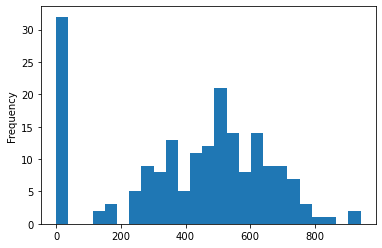

In [65]:
# check the plot of the data for score to see the distribution
df['score'].plot(kind='hist', bins=25)

### dealing with missing data - bad values

In [ ]:
# look for how many values have a -1 value in 'score'
sum(df['score'] == -1)

In [66]:
# drop any row with -1 value in 'score'
df = df[df['score'] != -1]
df.shape

(157, 6)

### creating new columns (mutating)
- `assign` can be very helpful in adding a new column
- lambda functions cna be used to carry out calculations

In [67]:
# convert age in years to age in (approximate) days
df = df.assign(age_days = df['age'] * 365)
df.head()

,id,first_name,last_name,age,score,value,age_days
1,620,Bill,Woods,46,492,46713.90,16790
2,891,Alexander,Jacobson,48,489,32071.74,17520
5,2049,Stephen,Williams,57,333,138936.92,20805
7,2607,Amber,Garcia,50,536,9367.27,18250
8,2635,David,Coleman,68,351,66035.28,24820


In [68]:
df['age_months'] = df['age'] * 12
df.head()

,id,first_name,last_name,age,score,value,age_days,age_months
1,620,Bill,Woods,46,492,46713.90,16790,552
2,891,Alexander,Jacobson,48,489,32071.74,17520,576
5,2049,Stephen,Williams,57,333,138936.92,20805,684
7,2607,Amber,Garcia,50,536,9367.27,18250,600
8,2635,David,Coleman,68,351,66035.28,24820,816


### grouping and summarizing
- group by particular variable
- calculate summary statistics/metrics within group

In [69]:
df.age.value_counts()

52    10
53     9
44     8
46     7
47     7
57     6
48     6
34     6
39     6
45     6
42     5
49     5
54     5
43     5
56     4
51     4
50     4
41     4
37     4
60     4
28     3
35     3
29     3
31     3
36     3
32     3
64     3
38     3
27     2
40     2
61     2
68     2
58     2
23     1
33     1
55     1
63     1
69     1
62     1
59     1
14     1
Name: age, dtype: int64

In [70]:
# calculate average within each age
df.groupby('age').agg('mean')

,id,score,value,age_days,age_months
age,,,,,
14,84812.000000,749.000000,5241.510000,5110.0,168.0
23,81282.000000,775.000000,9116.030000,8395.0,276.0
27,43311.000000,674.500000,10920.255000,9855.0,324.0
28,79935.333333,820.000000,16190.663333,10220.0,336.0
29,67990.333333,539.000000,5366.800000,10585.0,348.0
31,51448.333333,335.666667,5485.036667,11315.0,372.0
32,57812.333333,570.000000,11230.650000,11680.0,384.0
33,20708.000000,750.000000,6984.920000,12045.0,396.0
34,62912.833333,621.500000,20480.336667,12410.0,408.0


### sorting rows (arrange)
- specify order in which to display rows

In [ ]:
df = df.sort_values(by=['age'], ascending=False)
df.head()

### combining datasets

In [72]:
# create two dataframes
left = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value': np.random.randn(4)})    
right = pd.DataFrame({'key': ['B', 'D', 'E', 'F'], 'value': np.random.randn(4)})

In [73]:
left

,key,value
0,A,0.521163
1,B,-1.113710
2,C,0.153611
3,D,1.582684


In [74]:
right

,key,value
0,B,-0.470808
1,D,-0.350644
2,E,-0.687406
3,F,-0.276161


In [75]:
left.merge(right, on='key')


,key,value_x,value_y
0,B,-1.113710,-0.470808
1,D,1.582684,-0.350644


In [76]:
# inner merge by default
pd.merge(left, right, on='key')

,key,value_x,value_y
0,B,-1.113710,-0.470808
1,D,1.582684,-0.350644


In [78]:
# same as above
pd.merge(left, right, on='key', how='inner')

,key,value_x,value_y
0,B,-1.113710,-0.470808
1,D,1.582684,-0.350644


In [77]:
# right merge
pd.merge(left, right, on='key', how='right')

,key,value_x,value_y
0,B,-1.113710,-0.470808
1,D,1.582684,-0.350644
2,E,NaN,-0.687406
3,F,NaN,-0.276161


In [79]:
# left merge
pd.merge(left, right, on='key', how='left')


,key,value_x,value_y
0,A,0.521163,NaN
1,B,-1.113710,-0.470808
2,C,0.153611,NaN
3,D,1.582684,-0.350644


In [80]:
# outer join
pd.merge(left, right, on='key', how='outer')

,key,value_x,value_y
0,A,0.521163,NaN
1,B,-1.113710,-0.470808
2,C,0.153611,NaN
3,D,1.582684,-0.350644
4,E,NaN,-0.687406
5,F,NaN,-0.276161


### visualizing data
- we'll have a whole lecture (or two) on visualization
- for now, we'll just look at one uniquely-pandas approach

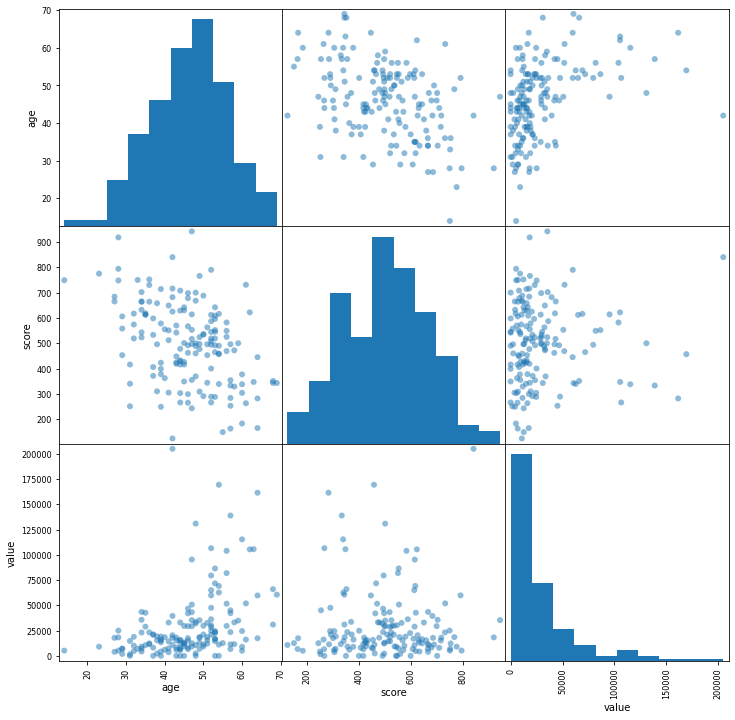

In [81]:
# plot all numerical columns, and their interactions
pd.plotting.scatter_matrix(df[['age', 'score', 'value']], figsize=[12, 12], marker=12);  

### application program interface (apis)
- apis are basically a way for software to talk to software
    -they are an interface into an application / website / database designed for computer / software 

note on api:
- follow api guidelines
- these guidelines typically specify the number / rate / size of requests

### requesting web pages from python

In [82]:
# the requests module allows you to send url requests
import requests
from bs4 import BeautifulSoup

In [83]:
# request data from the github api on a particular user
page = requests.get('https://api.github.com/users/jasongfleischer')

In [84]:
# the content we get bask is a messily 
page.content

b'{"login":"jasongfleischer","id":26612594,"node_id":"MDQ6VXNlcjI2NjEyNTk0","avatar_url":"https://avatars.githubusercontent.com/u/26612594?v=4","gravatar_id":"","url":"https://api.github.com/users/jasongfleischer","html_url":"https://github.com/jasongfleischer","followers_url":"https://api.github.com/users/jasongfleischer/followers","following_url":"https://api.github.com/users/jasongfleischer/following{/other_user}","gists_url":"https://api.github.com/users/jasongfleischer/gists{/gist_id}","starred_url":"https://api.github.com/users/jasongfleischer/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/jasongfleischer/subscriptions","organizations_url":"https://api.github.com/users/jasongfleischer/orgs","repos_url":"https://api.github.com/users/jasongfleischer/repos","events_url":"https://api.github.com/users/jasongfleischer/events{/privacy}","received_events_url":"https://api.github.com/users/jasongfleischer/received_events","type":"User","site_admin":false,"name":

In [86]:
# we can read in the json data with pandas
git_data = pd.read_json(page.content, typ='series')

# check out the pandas series object full of data
git_data

login                                                    jasongfleischer
id                                                              26612594
node_id                                             MDQ6VXNlcjI2NjEyNTk0
avatar_url             https://avatars.githubusercontent.com/u/266125...
gravatar_id                                                             
url                         https://api.github.com/users/jasongfleischer
html_url                              https://github.com/jasongfleischer
followers_url          https://api.github.com/users/jasongfleischer/f...
following_url          https://api.github.com/users/jasongfleischer/f...
gists_url              https://api.github.com/users/jasongfleischer/g...
starred_url            https://api.github.com/users/jasongfleischer/s...
subscriptions_url      https://api.github.com/users/jasongfleischer/s...
organizations_url      https://api.github.com/users/jasongfleischer/orgs
repos_url              https://api.github.com/users

### authorized access - oauth
open authorization is a protocol to authorize access (of a user / application) to an api

oauth provides a way to 'log-in' without using account names and passwords

it is effectively a set of keys, and passwords you can use to access to apis

### web scrapping vs. apis
web scraping and apis are different approaches:
- api are interface to interact with application, designed for programmatic use:
    - they allow systematic, controlled access to (for example) and application
    - they typically return structured (friendly) data
- web scraping (typically) involves navigating through the internet, programmatically following an architecture built for humans:
    - this can hard be systematize, being dependent on the idiosyncracies of a web page, at the time you request it
    - this typically returns relatively unstructured data
    - this entials much more wrangling of the data

### where to find data?

* [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets/blob/master/README.rst)
* [Data.gov](https://catalog.data.gov/dataset)
* [Data Is Plural](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0)
* [UCSD Datasets](https://ucsd.libguides.com/data-statistics/home)
* [Datasets | Deep Learning](http://deeplearning.net/datasets/)
* [Stanford | Social Science Data Collection](https://data.stanford.edu/)
* [Eviction Lab (email required)](https://evictionlab.org/get-the-data/)
* [San Diego Data](https://data.sandiego.gov/)
* [US Census](https://www.census.gov/)
* [Open Climate Data](http://openclimatedata.net/)
* [Data and Story Library](https://dasl.datadescription.com/datafiles/)
* [UCSD behavioral mobile data](http://extrasensory.ucsd.edu/)
* [Kaggle](https://www.kaggle.com/)
* [FiveThirtyEight](https://data.fivethirtyeight.com/)
* [data.world](https://data.world/)
* [Free Datasets - R and Data Mining ](http://www.rdatamining.com/resources/data)
* [Data Sources for Cool Data Science Projects](https://blog.thedataincubator.com/2014/10/data-sources-for-cool-data-science-projects-part-1/)

## notes on working with data

### data science is ad-hoc

- it is part of the job description to put things together that were not designed to go together
- we do not have universal solutions, but haphazard idiosyncratic systems, for data collection, storage and analysis
- data is everywhere. but relatively little of it was collected as data

### data collection, curation, and storage are diffcult
- it can be difficult to choose broadly useful standards
- take time to think about your data, and how you will load, store, organize, and save it

### data is inherently noisy
- we live in a mesy, noisy world, with messy, noisy, people, using messy noisy instruments
- there is no perfect data
    - there is better / or worse data, given the context

### different objectives
- humans and computers are different
- we interact with 'data' in differnt ways
- this underlies many aspects of data wrangling
    - the 'friendliness' of data types / files
    - the difference between web scraping and apis
    - a disconnect between data in the real world, and data we want to use

### so... what to do?
- think about how your data are stored and its structure?
- look at your data before you analyze it
    - are there missing values?
    - outlier values?
- is your data trustworthy?
    - source?
    - how was it generated?

### specific recommendations
- prioritize using well structured, common, open file types
    - take advantage of existing tools to deal with these files (numpy, pandas, etc)
- look into, and then follow common conventions
    - minimize custom objects, workflows, and data files
- look for apis. ask if they are available
    - acknowledge that web scrapping and/or wrangling unstructured data are complex/long tasks
- think about data flow from the beginning. organize your data pipeline, consider the 'wrangling' aspects throughout
    - set yourself up with well organized, labelled approach to your data
    - think about when and how you might want/need to save out intermediate results